# Introduction to Data Science
# HW04 - Data Modeling
---

(Latest update: 15/12/2024)

Student Name: Huỳnh Tấn Đạt

Student ID: 22127059

---

## 1. Introduction
### Objective

In this assignment, we aim to classify the quality of Portuguese **Vinho Verde** red wine using machine learning techniques. Building on the Exploratory Data Analysis (EDA) conducted in HW3, we will:
- Leverage insights from the EDA to prepare the dataset for modeling.
- Develop and fine-tune at least three classification models to predict wine quality.
- Address challenges such as an imbalanced dataset and limited samples.
- Evaluate and compare model performance using various metrics and visualizations.

Through this process, we seek to overcome the challenges posed by the dataset and build robust models that effectively classify wine quality.

---

### Import

In [122]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

## 2. Data Preparation

### 2.1 Data Preprocessing

Load the **Wine Quality** dataset

In [123]:
data_path = "./winequality.csv"
data = pd.read_csv(data_path)

Display the first 5 rows of the dataset

In [124]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Information about dataset

In [125]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


Check for missing values in the dataset

In [126]:
data.isnull().sum() 

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### 2.2 Data Analysis and Visualization

Statistical measures of the dataset

In [127]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


Analyzing wine quality via barplot

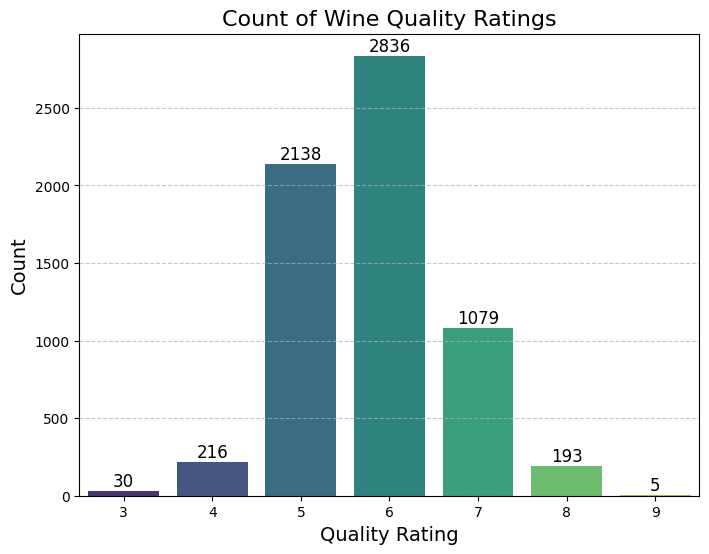

In [128]:
# Count quality ratings
quality_counts = data['quality'].value_counts().sort_index()

# Create a barplot
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=quality_counts.index, y=quality_counts.values, palette='viridis')

# Annotate each bar with its count value
for i, count in enumerate(quality_counts.values):
    ax.text(i, count + 5, str(count), ha='center', va='bottom', fontsize=12, color='black')

# Add labels and title
plt.title('Count of Wine Quality Ratings', fontsize=16)
plt.xlabel('Quality Rating', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

**Insights**:

- **Imbalanced Quality Ratings**: Most wines are rated between 5 and 6, with very few samples rated as 3, 4, 8, or 9. This highlights class imbalance.
- **Common Quality Scores**:
    - **6** is the most frequent rating (2,836 samples), followed by 5 (2,138 samples).
    - Ratings of **7** and higher are much less common, indicating fewer high-quality wines.
- **Skewed Distribution:** The data is slightly skewed toward lower to moderate quality scores (5-6), which could influence model predictions.

Display correlations between all features via heatmap

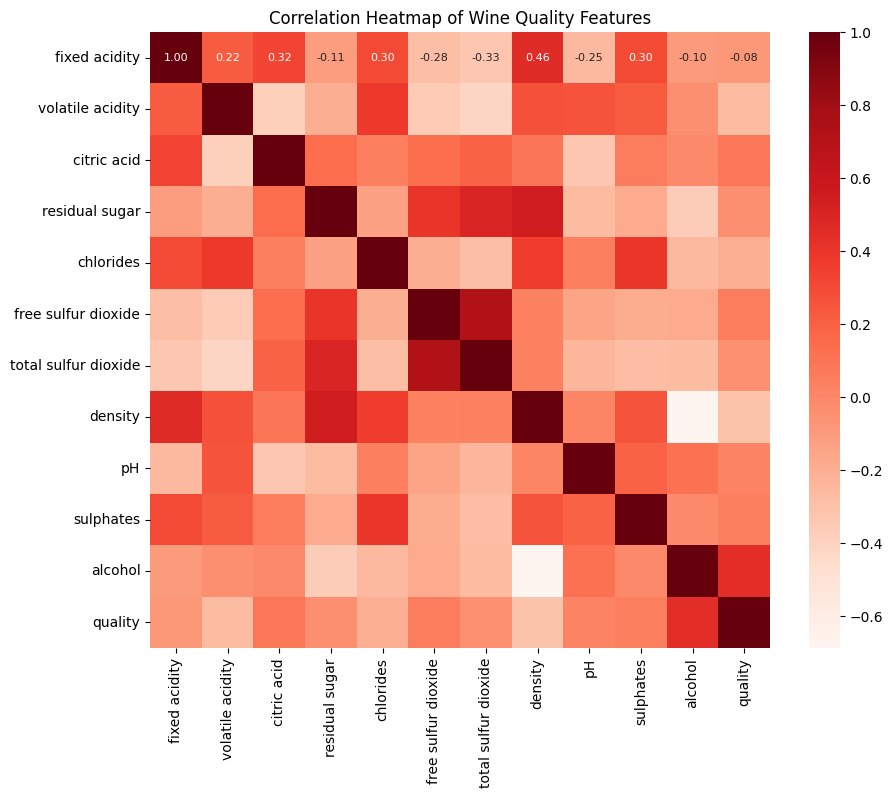

In [129]:
# Compute the correlation matrix
correlation_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cbar=True, annot=True, cmap='Reds', fmt=".2f", annot_kws={'size': 8})
plt.title("Correlation Heatmap of Wine Quality Features")
plt.show()

### 2.3 Data Splitting

Splitting the dataset into **training**, **validation**, and **testing** sets:

- **Training set (60%)**: Used to train the model. 
- **Validation set (20%)**: Used to optimize and select the best parameters.
- **Testing set (20%)**: Used to evaluate the final model.

In [130]:
X = data.drop(columns=['quality'])
y = data['quality'].apply(lambda x: 0 if x <=4 else (2 if x >= 7 else 1))

Split the data into **training (80%)** and **testing (20%)**.

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Split the training set into **training (75%)** and **validation (25%)**.

In [132]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.25, random_state=42, stratify=y_train)

In [133]:
print(y.shape, y_train.shape, y_valid.shape, y_test.shape)

(6497,) (3897,) (1300,) (1300,)


---

## 3. Model Building

### 3.1 Model Selection

We'll choose **three classification models** to compare: 
1. **Random Forest**
2. **Support Vector Machine (SVM)**
3. **Gradient Boosting**

Instantiate the models.

In [134]:
model = RandomForestClassifier()

Fit the models on the training data.

In [135]:
model.fit(X_train, y_train)

RandomForestClassifier()

Make predictions on the validation set.

In [136]:
X_test_pred = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_pred, y_test)

In [137]:
print('Accuracy: ',test_data_accuracy)

Accuracy:  0.8284615384615385


In [140]:
input_data = (10.3,0.32,0.45,6.4,0.073,5.0,13.0,0.9976,3.23,0.82,12.6)

# Change the input data to a numpy array
input_data_as_np_array = np.asarray(input_data)
input_data_reshaped = input_data_as_np_array.reshape(1, -1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 2):
    print('High Quality Wine')
elif (prediction[0] == 0):
    print('Low Quality Wine')
else:
    print('Medium Quality Wine')

[2]
High Quality Wine


c:\Users\htdat\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


### 3.2 Hyperparameter Tuning

Define the parameter grids for each of these models and perform hyperparameter tuning using GridSearchCV.

---

## 4. Model Evaluation

### 4.1 Evaluation Metrics

### 4.2 Visualizations

---

## 5. Conclusion

- Summarize the findings and compare the models' performance.
- Discuss challenges and potential improvements.

---

## References

1. [Red Wine Quality Prediction Using Regression Modeling and Machine Learning - Dexter Nguyen](https://towardsdatascience.com/red-wine-quality-prediction-using-regression-modeling-and-machine-learning-7a3e2c3e1f46)
2. [scikit-learn Supervised Learning](https://scikit-learn.org/stable/supervised_learning.html)
3. [Random Forest Algorithm in Machine Learning - GeeksForGeeks](https://www.geeksforgeeks.org/random-forest-algorithm-in-machine-learning/)
